For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 

In [5]:
import pandas as pd
import numpy as np

In [6]:
ti = pd.read_csv("titanic.csv")
ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Survived = 0 = No, 1 = Yes

In [7]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
ti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
########check for missing data
ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*********************************************************************************
survival rate vs class

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
ti["PassengerClass"] = ti["Pclass"]

In [12]:

col         = 'Pclass'
conditions  = [ ti[col] == 1, ti[col] == 2, ti[col] == 3 ]
choices     = [ "Upper", "Medium", "Lower" ]

ti["PassengerClass"] = np.select(conditions, choices, default=np.nan)


In [45]:
col2         = 'Survived'
conditions2  = [ ti[col2] == 0, ti[col2] == 1]
choices2     = [ "No", "Yes"]

ti["SurvivedorNot"] = np.select(conditions2, choices2, default=np.nan)

In [14]:
round(ti[['PassengerClass', 'Survived']].groupby(['PassengerClass'], as_index=True).mean()*100,2)

,Survived
PassengerClass,
Lower,24.24
Medium,47.28
Upper,62.96


In [72]:
DeadorAlivet = pd.crosstab( ti['PassengerClass'],ti['SurvivedorNot'])
DeadorAlivet

SurvivedorNot,No,Yes
PassengerClass,,
Lower,372,119
Medium,97,87
Upper,80,136


In [73]:
##### calculate death and survival percentage

DeadorAlive[["Death_%","Survived_%"]]=round(DeadorAlivet.div(DeadorAlivet.sum(axis=1), axis=0)*100,2)
DeadorAlive

SurvivedorNot,No,Yes,Death_%,Survived_%
PassengerClass,,,,
Lower,372,119,75.760000,24.240000
Medium,97,87,52.720000,47.280000
Upper,80,136,37.040000,62.960000


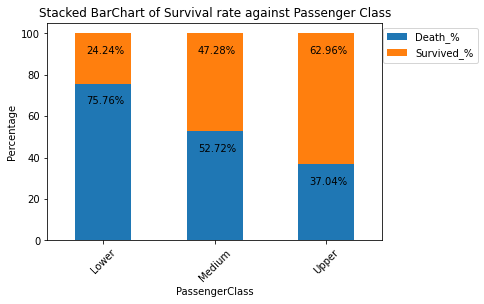

In [74]:
DeadorAlive[["Death_%","Survived_%"]].plot(kind="bar", stacked=True)

plt.title('Stacked BarChart of Survival rate against Passenger Class')

plt.xlabel('PassengerClass')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

for countd, valued in enumerate(DeadorAlive["Death_%"]):
    plt.text(countd-0.15,valued-10,str(valued)+'%')
    
for counta, valuea in enumerate(DeadorAlive["Survived_%"]):
    plt.text(counta-0.15,90,str(valuea)+'%')

plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1))

****************************************************
survival rate vs Gender

In [75]:
DeadorAlive2t = pd.crosstab(ti['Sex'], ti['SurvivedorNot'])
DeadorAlive2t

SurvivedorNot,No,Yes
Sex,,
female,81,233
male,468,109


In [78]:
##### calculate death and survival percentage

DeadorAlive2[["Death_%","Survived_%"]]=round(DeadorAlive2t.div(DeadorAlive2t.sum(axis=1), axis=0)*100,2)
DeadorAlive2

SurvivedorNot,No,Yes,Death_%,Survived_%
Sex,,,,
female,81,233,25.800000,74.200000
male,468,109,81.110000,18.890000


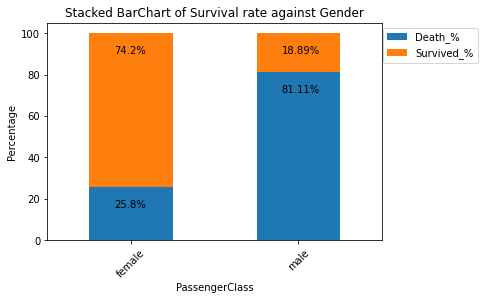

In [79]:
DeadorAlive2[["Death_%","Survived_%"]].plot(kind="bar", stacked=True)

plt.title('Stacked BarChart of Survival rate against Gender')

plt.xlabel('PassengerClass')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

for countd, valued in enumerate(DeadorAlive2["Death_%"]):
    plt.text(countd-0.1,valued-10,str(valued)+'%')
    
for counta, valuea in enumerate(DeadorAlive2["Survived_%"]):
    plt.text(counta-0.1,90,str(valuea)+'%')

plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1))




****************************************
survival rate vs Age

In [24]:
#####check for passenger age range
ti["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [147]:
#####check for passenger median age group by gender and class
ti.groupby(["Sex","PassengerClass"])["Age"].median()

Sex     PassengerClass
female  Lower             21.5
        Medium            28.0
        Upper             35.0
male    Lower             25.0
        Medium            30.0
        Upper             40.0
Name: Age, dtype: float64

In [25]:
ti.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
PassengerClass      0
SurvivedorNot       0
dtype: int64

In [26]:
ti["AgeFilled"]=ti["Age"]

In [36]:
##### fill missing age according to passenger's gender and class with coresponding median


def filling(sex,p_class,age):

    R_row  = [ np.where ((ti["Age"].isnull()) & (ti["Sex"] == sex) & (ti["PassengerClass"] == p_class)) ]
    R_median    = age

    ti.iloc[R_row,14] = R_median

In [37]:
filling("female","Lower",21.5)
filling("female","Medium",28)
filling("female","Upper",35)

In [38]:
filling("male","Lower",25)
filling("male","Medium",30)
filling("male","Upper",40)

In [44]:
##### check if all age filled
ti.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
PassengerClass      0
SurvivedorNot       0
AgeFilled           0
agegroup            0
dtype: int64

Children (00-14 years)
Youth (15-24 years)
Adults (25-64 years)
Seniors (65 years and over)

In [42]:
##### create age group bins


agesplit = [0,14,24,64,80]
agestatus = ['Children','Youth','Adult','Seniors']

ti['agegroup']=pd.cut(ti.AgeFilled,agesplit,labels=agestatus)

In [80]:
DeadorAlive3t = pd.crosstab(ti['agegroup'], ti['SurvivedorNot'])
DeadorAlive3t

SurvivedorNot,No,Yes
agegroup,,
Children,32,45
Youth,144,98
Adult,363,198
Seniors,10,1


In [81]:
##### calculate death and survival percentage

DeadorAlive3[["Death_%","Survived_%"]]=round(DeadorAlive3t.div(DeadorAlive3t.sum(axis=1), axis=0)*100,2)
DeadorAlive3

SurvivedorNot,No,Yes,Death_%,Survived_%
agegroup,,,,
Children,32,45,41.560000,58.440000
Youth,144,98,59.500000,40.500000
Adult,363,198,64.710000,35.290000
Seniors,10,1,90.910000,9.090000


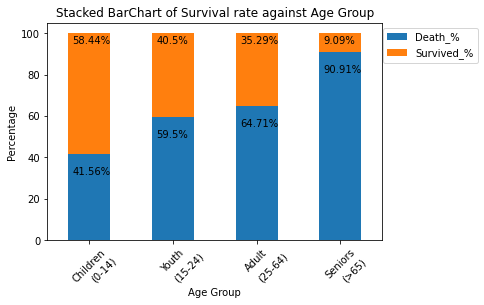

In [55]:
DeadorAlive3[["Death_%","Survived_%"]].plot(kind="bar", stacked=True)

plt.title('Stacked BarChart of Survival rate against Age Group')

plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

for countd, valued in enumerate(DeadorAlive3["Death_%"]):
    plt.text(countd-0.2,valued-10,str(valued)+'%')
    
for counta, valuea in enumerate(DeadorAlive3["Survived_%"]):
    plt.text(counta-0.2,95,str(valuea)+'%')

plt.text(0,-20,"(0-14)",rotation=45)
plt.text(1,-20,"(15-24)",rotation=45)
plt.text(2,-20,"(25-64)",rotation=45)
plt.text(3,-20,"(>65)",rotation=45)
    
plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1))




In [82]:
### calculate chi-square testing


cClass, pClass, dofClass, ExpectedClass= chi2_contingency(DeadorAlivet)
cSex, pSex, dofSex, ExpectedSex= chi2_contingency(DeadorAlive2t)
cAge, pAge, dofAge, ExpectedAge= chi2_contingency(DeadorAlive3t)

ChiClass = [cClass, "%.6f" % pClass, dofClass]
ChiSex = [cSex, "%.6f" % pSex, dofSex]
ChiAge = [cAge, "%.6f" % pAge, dofAge]

In [83]:
ChiSq = pd.DataFrame([ChiClass,ChiSex,ChiAge], columns =['chi-square test statistic', 'p-value', 'dof'], dtype = float)

In [84]:
print(ChiSq)

   chi-square test statistic  p-value      dof
0                 102.888989 0.000000 2.000000
1                 260.717020 0.000000 1.000000
2                  19.809971 0.000186 3.000000


In [85]:
import scipy.stats
ChiSq["Critical_Value"]=scipy.stats.chi2.ppf(1-.05, df=ChiSq["dof"])

In [87]:
print(ChiSq)

   chi-square test statistic  p-value      dof  Critical_Value
0                 102.888989 0.000000 2.000000        5.991465
1                 260.717020 0.000000 1.000000        3.841459
2                  19.809971 0.000186 3.000000        7.814728


In [88]:
cona="reject null: Not independent"
conb="cannot reject null: independent"

ChiSq["Result"]= np.where(ChiSq["chi-square test statistic"] > ChiSq["Critical_Value"], cona, conb)


In [89]:
pd.options.display.float_format = "{:,.6f}".format

In [90]:
ChiSq.index = ["PassengerClass","Gender","Age"]

In [91]:
ChiSq

,chi-square test statistic,p-value,dof,Critical_Value,Result
PassengerClass,102.888989,0.000000,2.000000,5.991465,reject null: Not independent
Gender,260.717020,0.000000,1.000000,3.841459,reject null: Not independent
Age,19.809971,0.000186,3.000000,7.814728,reject null: Not independent


In [94]:
ti.to_csv("/Users/benjamin/Desktop/titanic_after.csv")